✅ Data Loaded Successfully
Shape: (101766, 50)
Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
   encounter_id  patient_nbr  race  gender  age  weight  admission_type_id  \
0       2278392      8222157     3       0    0 

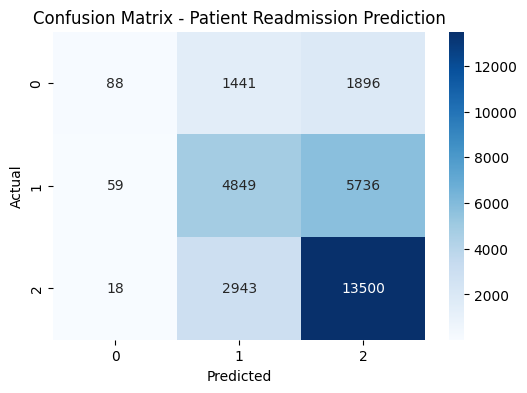

C:\Users\DELL\AppData\Local\Temp\ipykernel_29508\2098256444.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature', palette='viridis')


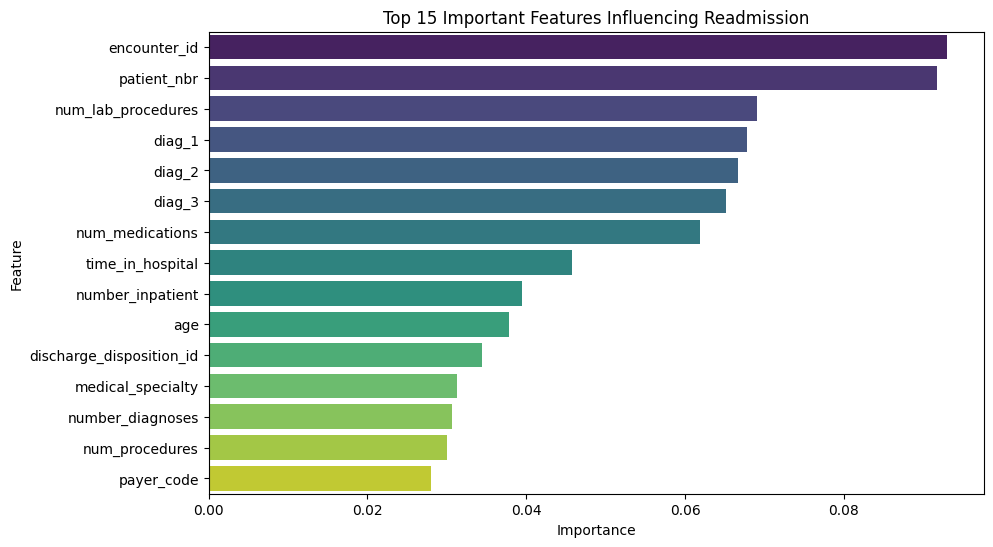


✅ Model saved as 'readmission_model.pkl'


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Cleaned Data
df = pd.read_csv("../data/cleaned_patient_data.csv")

print("✅ Data Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 3️⃣ Define Features (X) and Target (y)
target_col = 'readmitted'  # change if named differently
X = df.drop(columns=[target_col])
y = df[target_col]

# 4️⃣ Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

# 5️⃣ Train Model (Random Forest)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 6️⃣ Make Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate Model
print("\n✅ MODEL EVALUATION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8️⃣ Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Patient Readmission Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Feature Importance Visualization
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Important Features Influencing Readmission")
plt.show()

# 🔟 Save the trained model (optional)
import joblib
joblib.dump(model, "readmission_model.pkl")
print("\n✅ Model saved as 'readmission_model.pkl'")


In [6]:
import joblib

# Save trained model
joblib.dump(best_model, "../readmission_model.pkl")

# Save scaler (used in preprocessing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # fit scaler on the training features
joblib.dump(scaler, "../scaler.pkl")

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [7]:
import joblib

# Suppose your training DataFrame is X_train (after encoding and preprocessing)
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

# Also save your trained model if not already done
joblib.dump(model, "model.pkl")

print("✅ Model and feature columns saved successfully!")


✅ Model and feature columns saved successfully!
